### import 


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.metrics import confusion_matrix
import seaborn as sns
import math
from sklearn.model_selection import train_test_split

# implementation of K-mean

In [ ]:
def get_points(k,train_X):
  n=1
  mean=[np.mean(train) for train in np.transpose(train_X)]
  points=np.zeros([k,len(mean)])
  points[0][:]=mean
  min=-5
  max=5
  while k>2*n:
    for i in range(n):
      for index ,number in enumerate(points[i]):
            points[i+n][index]=number+np.random.randint(min,max)
            points[i][index]=number+np.random.randint(min,max)
    n=2*n
    clusters=np.zeros([n,len(train_X),len(mean)])
    count_in_each_cluster=np.zeros([n])
    d=np.zeros([n])
    for ind, data in enumerate(train_X):
      for index,point in enumerate(points[0:n][:]):
        d[index]=np.sum(np.power(np.subtract(point,data),2))
      indx=np.argmin(d)
      clusters[indx][ind][:]=data
      count_in_each_cluster[indx]+=1
    count_in_each_cluster
    for i in range(n):
      mean=[np.sum(train)/count_in_each_cluster[i] for train in np.transpose(clusters[i])]
      points[i][:]=mean
  remain=k-n
  for i in range(remain):
    ind=np.argmax(count_in_each_cluster)
    for index ,number in enumerate(points[ind]):
            points[n][index]=number+np.random.randint(min,max)
            points[ind][index]=number+np.random.randint(min,max)
    n=n+1
    clusters=np.zeros([n,len(train_X),len(mean)])
    count_in_each_cluster=np.zeros([n])
    d=np.zeros([n])
    for ind, data in enumerate(train_X):
      for index,point in enumerate(points[0:n][:]):
        d[index]=np.sum(np.power(np.subtract(point,data),2))
      indx=np.argmin(d)
      clusters[indx][ind][:]=data
      count_in_each_cluster[indx]+=1
    count_in_each_cluster
    for i in range(n):
      mean=[np.sum(train)/count_in_each_cluster[i] for train in np.transpose(clusters[i])]
      points[i][:]=mean
  return points

In [ ]:
def classify(iterations,k,train_X,points):
  y_predict=np.zeros(len(train_X))
  for i in range(iterations):
    clusters=np.zeros([k,len(train_X),len(points[0])])
    count_in_each_cluster=np.zeros([k])
    d=np.zeros([k])
    for ind, data in enumerate(train_X):
      for index,point in enumerate(points[0:k][:]):
        d[index]=np.sum(np.power(np.subtract(point,data),2))
      indx=np.argmin(d)
      clusters[indx][ind][:]=data
      count_in_each_cluster[indx]+=1
      y_predict[ind]=indx
    for i in range(k):
      mean=[np.sum(train)/count_in_each_cluster[i] for train in np.transpose(clusters[i])]
      points[i][:]=mean
  return y_predict

# import the data

In [ ]:
digits = datasets.load_digits() 
x_data = digits.images.reshape(len(digits.images),8*8)
y_data = digits.target.copy()
train_X , test_X ,train_y,test_y = train_test_split(x_data,y_data,test_size = 1/4 , shuffle = 1)

# test the model

In [ ]:
k=10
points=get_points(k,train_X)
y_predict=classify(100,k,train_X,points)

## get the clustures

actual   predicted


array([[0., 6.],
       [1., 5.],
       [2., 9.],
       [3., 8.],
       [4., 1.],
       [5., 7.],
       [6., 2.],
       [7., 3.],
       [8., 5.],
       [9., 8.]])

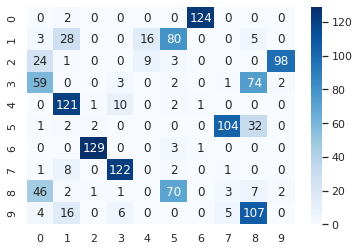

In [ ]:
sns.set()
cm = confusion_matrix(train_y, y_predict)
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
map=np.zeros([10,2])
for i in range(10):
  map[i][0]=i
  map[i][1]=np.argmax(cm[i][:])
print('actual   predicted')
map

# accurcy test for clusturing

In [ ]:
sum=0
for ind,i in enumerate(train_y):
  if map[i][1]==y_predict[ind]:
    sum+=1
print('accuracy of clusturing =',sum/len(train_y)*100, '%')

accuracy of clusturing = 76.39198218262806 %


# NN implementation

In [ ]:
class out_layer:
  def __init__(self,inputs_num,outputs_num):  # type 0 for hidden layer 1 for output layet
    self.weigths=(np.random.rand(inputs_num,outputs_num)-0.5)
  def forward(self,inputs):
    self.net=np.dot(np.transpose( self.weigths),inputs)
  def output_function(self): #defined as segmoid
    o=[2**(-power) for power in  self.net]
    self.outputs=[1/(n+1) for n in o]
  def func_drev(self):
    self.drev=[s*(1-s) for s in self.outputs]
  def dE_dO_outpytlayer(self,output):
    self.dE_dO=output-self.outputs
  def get_delta(self):
    self.delta=[-d*s for d,s in  zip( self.dE_dO,self.drev)]
  def w_change(self,prev_out):
    #self.delta_w=[-o*p for o,p in zip(prev_out,self.delta)]
    self.delta_w=np.outer(prev_out,self.delta)
  def update_w(self):
    self.weigths=[ w-d for w,d in  zip(self.weigths,self.delta_w)]
  def total_forward(self,inputs):
    self.forward(inputs)
    self.output_function()
  def total_backword(self,output,prev_out):
    self.func_drev()
    self.dE_dO_outpytlayer(output)
    self.get_delta()
    self.w_change(prev_out)
    self.update_w()
######################################################
class inner_layer:
  def __init__(self,inputs_num,outputs_num):  # type 0 for hidden layer 1 for output layet
    self.weigths=(np.random.rand(inputs_num,outputs_num)-0.5)
  def forward(self,inputs):
    self.net=np.dot(np.transpose(self.weigths),inputs)
  def output_function(self): #defined as segmoid
    o=[2**(-power) for power in  self.net]
    self.outputs=[1/(n+1) for n in o]
  def func_drev(self):
    self.drev=[s*(1-s) for s in self.outputs]
  def dE_dO_outpytlayer(self,nex_w,nex_delta):
    self.dE_dO=-np.dot( nex_delta,np.transpose( nex_w))
  def get_delta(self):
    self.delta=[-d*s for d,s in  zip( self.dE_dO,self.drev)]
  def w_change(self,prev_out):
    self.delta_w=np.outer(prev_out,self.delta)
  def update_w(self):
    self.weigths=[ w-d*0.01 for w,d in  zip(self.weigths,self.delta_w)]
  def total_forward(self,inputs):
    self.forward(inputs)
    self.output_function()
  def total_backword(self,output,prev_out,nex_w,nex_delta):
    self.func_drev()
    self.dE_dO_outpytlayer(nex_w,nex_delta)
    self.get_delta()
    self.w_change(prev_out)
    self.update_w()

# test the data with no clustuting

In [ ]:
l11=inner_layer(64,200) #first layer 784 inputs 7 outputs
l21=inner_layer(200,100) #second layer 7 inputs 5 outputs
l31=out_layer(100,10) #final layer 5 inputs 1 output
for j in range(20):
  for inputs,index in zip(train_X,train_y): # take the total data to train the model
    output=np.zeros(10)
    output[index]=1
    l11.total_forward(inputs)
    l21.total_forward(l11.outputs)
    l31.total_forward(l21.outputs)
    l31.total_backword(output,l21.outputs)
    l21.total_backword(l31.outputs,l11.outputs,l31.weigths,l31.delta)
    l11.total_backword(output,inputs,l21.weigths,l21.delta)
    #test the model
number_of_correct_detection=0
for x,y in zip(test_X,test_y):
  l11.total_forward(x)
  l21.total_forward(l11.outputs)
  l31.total_forward(l21.outputs)
  if np.argmax(l31.outputs)==y:
      number_of_correct_detection+=1
print('correcet detection percentage = ',number_of_correct_detection/len(test_y)*100 ,'%')

correcet detection percentage =  97.55555555555556 %


# test the clusting on test data 

In [ ]:
test_clusters=np.zeros(len(test_y))
for ind,i in enumerate(test_y):
  test_clusters[ind]=map[i][1]

In [ ]:
l11=inner_layer(64,200) #first layer 784 inputs 7 outputs
l21=inner_layer(200,100) #second layer 7 inputs 5 outputs
l31=out_layer(100,10) #final layer 5 inputs 1 output
for j in range(20):
  for inputs,index in zip(train_X,y_predict): # take the total data to train the model
    output=np.zeros(10)
    output[int(index)]=1
    l11.total_forward(inputs)
    l21.total_forward(l11.outputs)
    l31.total_forward(l21.outputs)
    l31.total_backword(output,l21.outputs)
    l21.total_backword(l31.outputs,l11.outputs,l31.weigths,l31.delta)
    l11.total_backword(output,inputs,l21.weigths,l21.delta)
    #test the model
number_of_correct_detection_cluster=0
actual_correct=0
counter=0
for x,y in zip(test_X,test_clusters):
  l11.total_forward(x)
  l21.total_forward(l11.outputs)
  l31.total_forward(l21.outputs)
  if np.argmax(l31.outputs)==y:
      number_of_correct_detection_cluster+=1
  if np.argmax(l31.outputs)== map[test_y[counter]][1]:
      actual_correct+=1
  counter+=1
print('correcet detection percentage according to the cluster only= ',number_of_correct_detection_cluster/len(test_y)*100 ,'%')
print('actual correcet detection percentage = ',actual_correct/len(test_y)*100 ,'%')

correcet detection percentage according to the cluster only=  78.44444444444446 %
actual correcet detection percentage =  78.44444444444446 %
